In [8]:
%pip install -q transformers tweepy matplotlib tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.frame

In [29]:
from twitterKeys import keys # import twitter api and secret keys
import pandas as pd
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
import tweepy
import time
from transformers import pipeline

In [40]:
# define query parameter
query = "Ethereum"

# define tweet count (between 10-100)
count = 100

# search for tweets using tweepy
client = tweepy.Client(keys['bearerToken'])

search = tweepy.Paginator(client.search_recent_tweets, query, max_results=count).flatten(count)

In [41]:
# set up inference pipeline
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# run sentiment analysis on each tweet
tweets = []
for tweet in search:
   try:
     content = tweet.text
     sentiment = sentiment_analysis(content)
     tweets.append({'tweet': content, 'sentiment': sentiment[0]['label']})
   except:
     pass

Downloading: 100%|██████████| 1.45k/1.45k [00:00<00:00, 627kB/s]
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [42]:
# load data into df
df = pd.DataFrame(tweets)
 
# show tweet for each sentiment
display(df[df["sentiment"] == 'POS'].head(1))
display(df[df["sentiment"] == 'NEU'].head(1))
display(df[df["sentiment"] == 'NEG'].head(1))

,tweet,sentiment
0,RT @CryptoGROWClub0: 200 $USDT× 20lucky participate \n\n• Must Follow us and @polkabright × @CryptoGROWClub0\n• Like and -Pin post Retweet\n• T…,POS


,tweet,sentiment
1,When the dip is deeper than you think...... 📉📈 #dip #HODLing #bearish #Bullish #BTC #Ethereum #nft #rugpull #stocks #StockMarket #forex,NEU


,tweet,sentiment
21,"⁉️ What's up with all this loot? \n\n💎 Loot is a World's first NFT that is soulbound to your PFP. If you sell your PFP, the loot goes with it.\n\nDon't have a cow❓You can checkout https://t.co/cVotQEVD0m to find what you are missing out on.\n\nLoot is open for all NFTs ‼️\n\n💰🐮🐮=❓",NEG


sentiment
NEG     9
NEU    66
POS    25
dtype: int64


<AxesSubplot: >

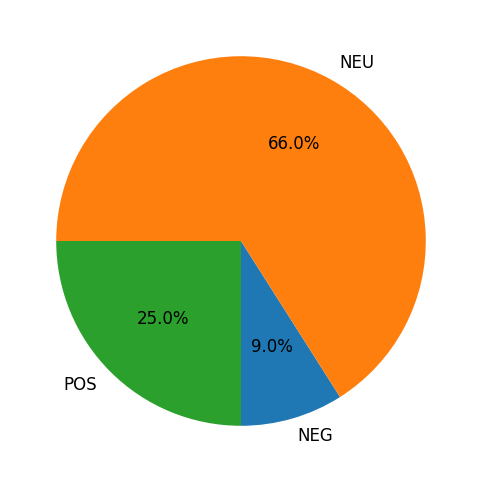

In [43]:
# number of tweets by sentiments
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

# visualise the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

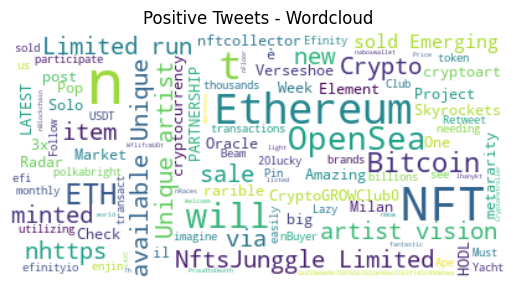

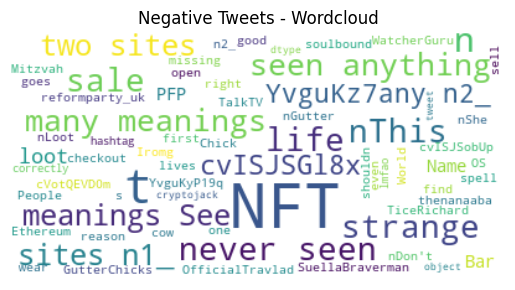

In [44]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# wordcloud with positive tweets
positive_tweets = df['tweet'][df["sentiment"] == 'POS']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 
# wordcloud with negative tweets
negative_tweets = df['tweet'][df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()